# Test simulated annealing optimization on a couple states

In [1]:
%matplotlib inline

import json

from gerrychain import Graph, Partition
from gerrychain.random import random
import geopandas
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

from rba import optimization
from rba.util import partition_by_county
from rba.visualization import visualize_partition_geopandas

In [2]:
# New Hampshire - easy test case

optimization.optimize(
    graph_file="../rba/data/2010/new_hampshire_geodata_merged.json",
    communitygen_out_file="../rba/data/2010/new_hampshire_communities.json",
    vra_config_file="../rba/data/2010/vra_nh.json",
    num_steps=100,
    num_districts=2,
    initial_plan_file="../rba/data/2010/new_hampshire_districts.json",
    output_dir="NH_opt_out",
    verbose=True
)

Loading precinct graph...done!
Loading community algorithm output...done!
VRA requirements...done!
Loading starting map...done!
Running Markov chain...


  0%|          | 0/100 [00:00<?, ?it/s]

Saving data from optimization...done!


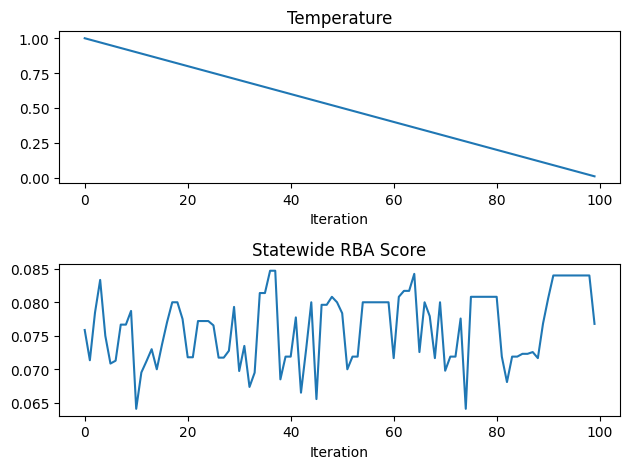

In [3]:
nh_df = pd.read_csv("NH_opt_out/optimization_stats.csv")

fig, axs = plt.subplots(2)
axs[0].plot(np.arange(len(nh_df.index)), nh_df["temperature"])
axs[0].set_title("Temperature")
axs[0].set_xlabel("Iteration")
axs[1].plot(np.arange(len(nh_df.index)), nh_df["state_gerry_score"])
axs[1].set_title("Statewide RBA Score")
axs[1].set_xlabel("Iteration")
plt.tight_layout()

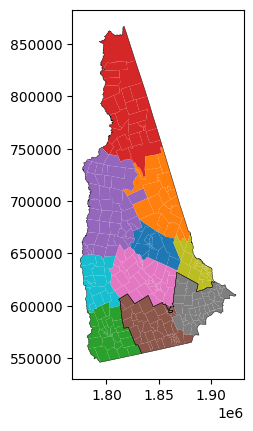

In [4]:
with open("NH_opt_out/Plan_1.json", "r") as f:
    best_assignment = json.load(f)

with open("../rba/data/2010/new_hampshire_geodata_merged.json", "r") as f:
    data = json.load(f)
nx_graph = nx.readwrite.json_graph.adjacency_graph(data)
graph = Graph.from_networkx(nx_graph)
del nx_graph

best_partition = Partition(graph, best_assignment)
county_partition = partition_by_county(graph)

ax = plt.axes()
visualize_partition_geopandas(county_partition, ax=ax, edgecolor="none", linewidth=0)
visualize_partition_geopandas(best_partition, union=True, ax=ax, facecolor="none", edgecolor="black", linewidth=0.3)
plt.show()

In [5]:
# Maryland - Edge case in terms of geography. It also now brings VRA into the picture.

optimization.optimize(
    graph_file="../rba/data/2010/maryland_geodata_merged.json",
    communitygen_out_file="../rba/data/2010/maryland_communities.json",
    vra_config_file="../rba/data/2010/vra_ma.json",
    num_steps=5,
    num_districts=8,
    # initial_plan_file="../rba/data/2010/maryland_districts.json",
    # NOTE: larger states seem to struggle to find spanning trees when starting from existing (often gerrymandered) maps
    initial_plan_file=None,
    output_dir="MA_opt_out",
    verbose=True
)

Loading precinct graph...done!
Loading community algorithm output...done!
VRA requirements...done!
No starting map provided. Will generate a random one later.
Creating random initial partition...done!
Running Markov chain...


  0%|          | 0/5 [00:00<?, ?it/s]

Saving data from optimization...done!


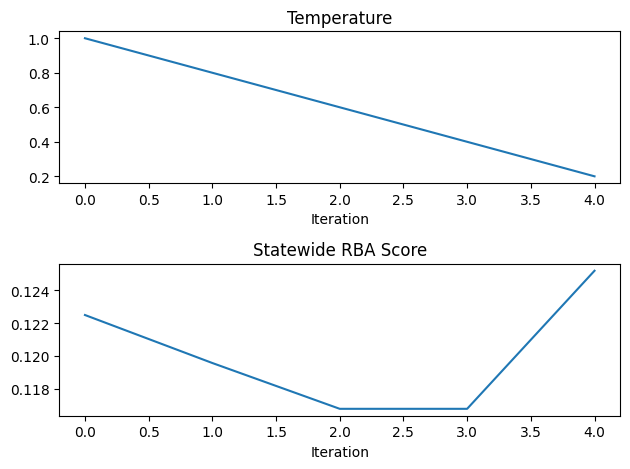

In [6]:
ma_df = pd.read_csv("MA_opt_out/optimization_stats.csv")

fig, axs = plt.subplots(2)
axs[0].plot(np.arange(len(ma_df.index)), ma_df["temperature"])
axs[0].set_title("Temperature")
axs[0].set_xlabel("Iteration")
axs[1].plot(np.arange(len(ma_df.index)), ma_df["state_gerry_score"])
axs[1].set_title("Statewide RBA Score")
axs[1].set_xlabel("Iteration")
plt.tight_layout()

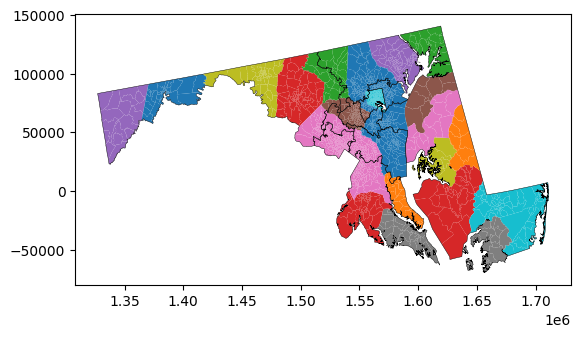

In [7]:
with open("MA_opt_out/Plan_1.json", "r") as f:
    best_assignment = json.load(f)

with open("../rba/data/2010/maryland_geodata_merged.json", "r") as f:
    data = json.load(f)
nx_graph = nx.readwrite.json_graph.adjacency_graph(data)
graph = Graph.from_networkx(nx_graph)
del nx_graph

best_partition = Partition(graph, best_assignment)
county_partition = partition_by_county(graph)

ax = plt.axes()
visualize_partition_geopandas(county_partition, ax=ax, edgecolor="none", linewidth=0)
visualize_partition_geopandas(best_partition, union=True, ax=ax, facecolor="none", edgecolor="black", linewidth=0.3)
plt.show()

In [2]:
# North Carolina - larger state.

optimization.optimize(
    graph_file="../rba/data/2010/north_carolina_geodata_merged.json",
    communitygen_out_file="../rba/data/2010/north_carolina_communities.json",
    vra_config_file="../rba/data/2010/vra_nc.json",
    num_steps=1000,
    num_districts=13,
#     initial_plan_file="../rba/data/2010/north_carolina_districts.json",
    initial_plan_file=None,
    output_dir="NC_opt_out",
    verbose=True
)

Loading precinct graph...done!
Loading community algorithm output...done!
VRA requirements...done!
No starting map provided. Will generate a random one later.
Creating random initial partition...done!
Running Markov chain...


  0%|          | 0/1000 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
nc_df = pd.read_csv("NC_opt_out/optimization_stats.csv")

fig, axs = plt.subplots(2)
axs[0].plot(np.arange(len(nc_df.index)), nc_df["temperature"])
axs[0].set_title("Temperature")
axs[0].set_xlabel("Iteration")
axs[1].plot(np.arange(len(nc_df.index)), nc_df["state_gerry_score"])
axs[1].set_title("Statewide RBA Score")
axs[1].set_xlabel("Iteration")
plt.tight_layout()

In [ ]:
with open("NC_opt_out/Plan_1.json", "r") as f:
    best_assignment = json.load(f)

with open("../rba/data/2010/north_carolina_geodata_merged.json", "r") as f:
    data = json.load(f)
nx_graph = nx.readwrite.json_graph.adjacency_graph(data)
graph = Graph.from_networkx(nx_graph)
del nx_graph

best_partition = Partition(graph, best_assignment)
county_partition = partition_by_county(graph)

ax = plt.axes()
visualize_partition_geopandas(county_partition, ax=ax, edgecolor="none", linewidth=0)
visualize_partition_geopandas(best_partition, union=True, ax=ax, facecolor="none", edgecolor="black", linewidth=0.3)
plt.show()